In [2]:
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

%matplotlib inline

# Matplotlib customizations.
plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1

Examine the following data sets from pydataset and answer the corresponding questions. Use visualizations to support your conclusions.
- `"iris"`, measurements of various species of iris flowers.
    1. Which species is easiest to distinguish from the others? How?
    2. Given iris data without a species label, what strategies could you use to identify the flower’s species?

In [18]:
data('iris', show_doc=True)
iris = data('iris')
iris.sample(10)
iris['Sepal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

[]

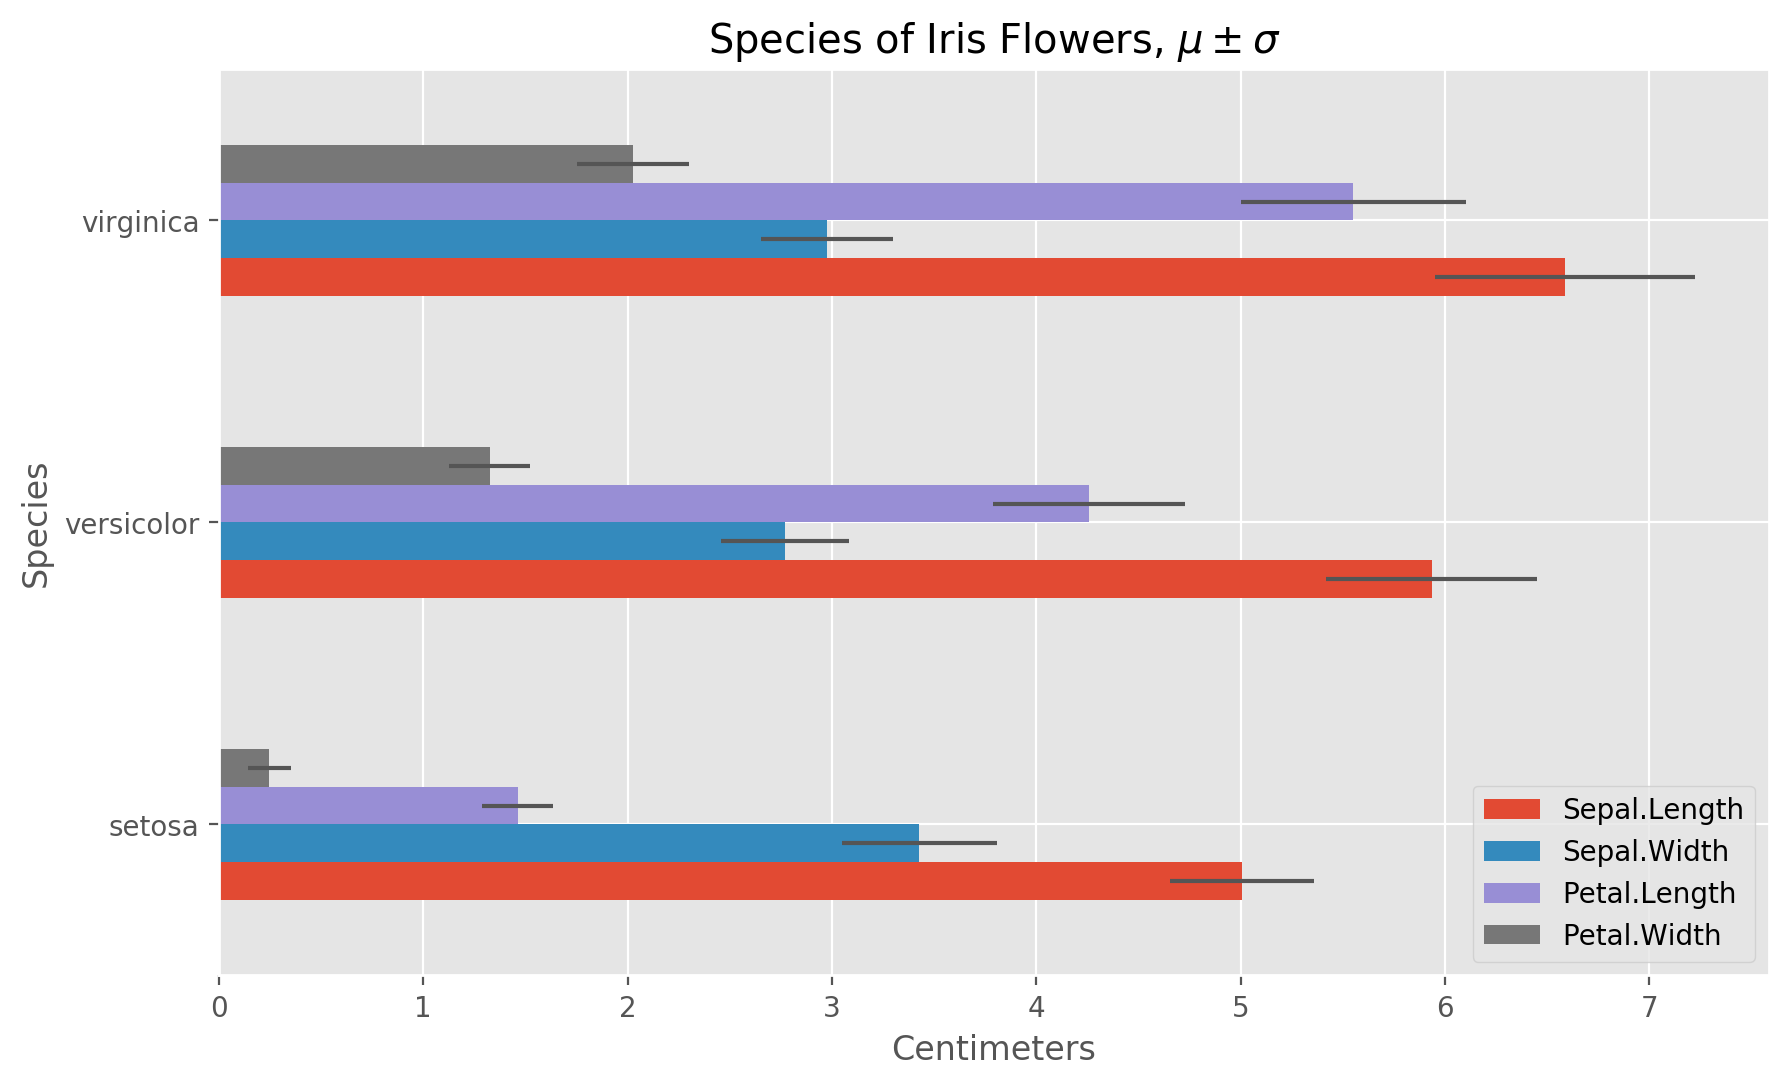

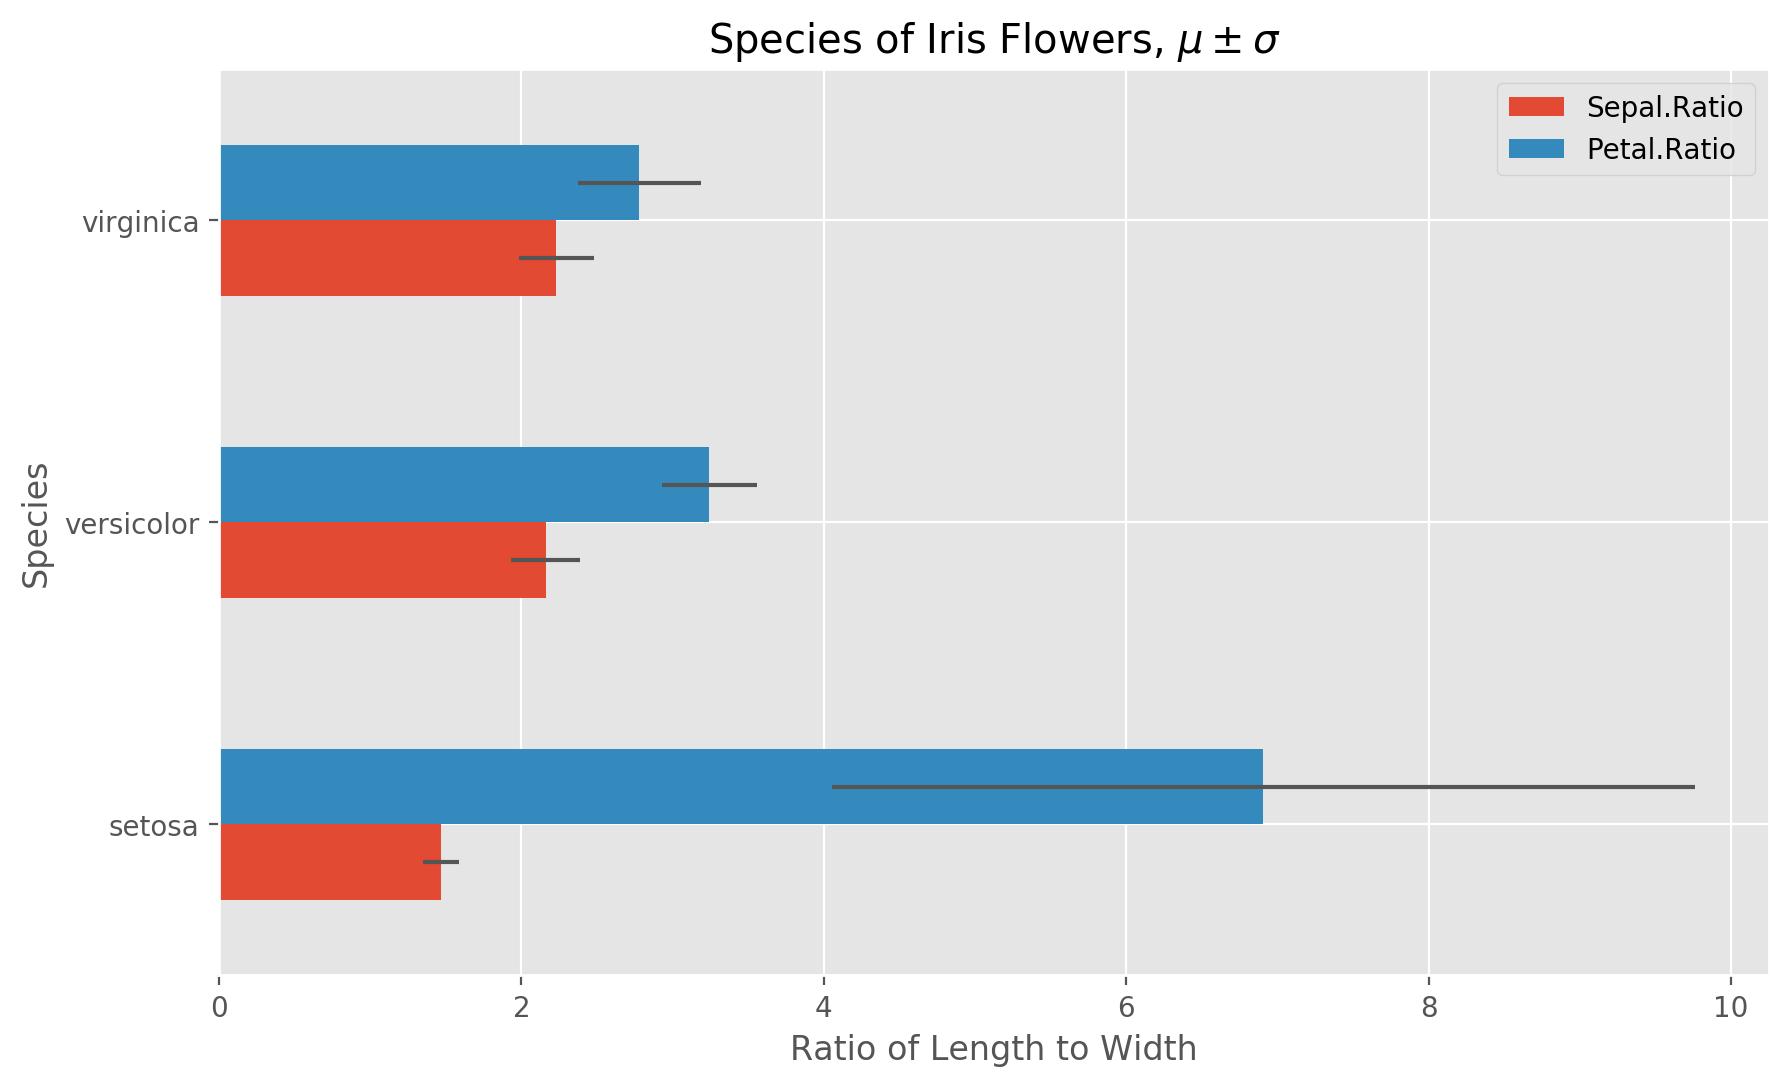

In [23]:
species = iris.groupby('Species')
species[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].mean().plot(kind='barh', xerr=species[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].std(), title=r"Species of Iris Flowers, $\mu\pm\sigma$")
plt.xlabel("Centimeters")
species[['Sepal.Ratio','Petal.Ratio']].mean().plot(kind='barh', xerr=species[['Sepal.Ratio','Petal.Ratio']].std(), title=r"Species of Iris Flowers, $\mu\pm\sigma$")
plt.xlabel("Ratio of Length to Width")
plt.plot()

I would argue that setosa is the easiest to distinguish because of the petal length/width ratio. If an iris has really long and skinny petals, it is likely a setosa. If the flower is just bigger in general than other iris flowers you've been seeing it's probably a virginica. Otherwise, it's probably a versicolor.

- `"poisons"`, experimental results of three different poisons and four different treatments.
    1. In general, which poison is most deadly? Which treatment is most effective?
    2. If you were poisoned, how would you choose the treatment if you did not know which poison it was? What if you did know which poison it was?
(Hint: group the data by poison, then group each subset by treatment.)

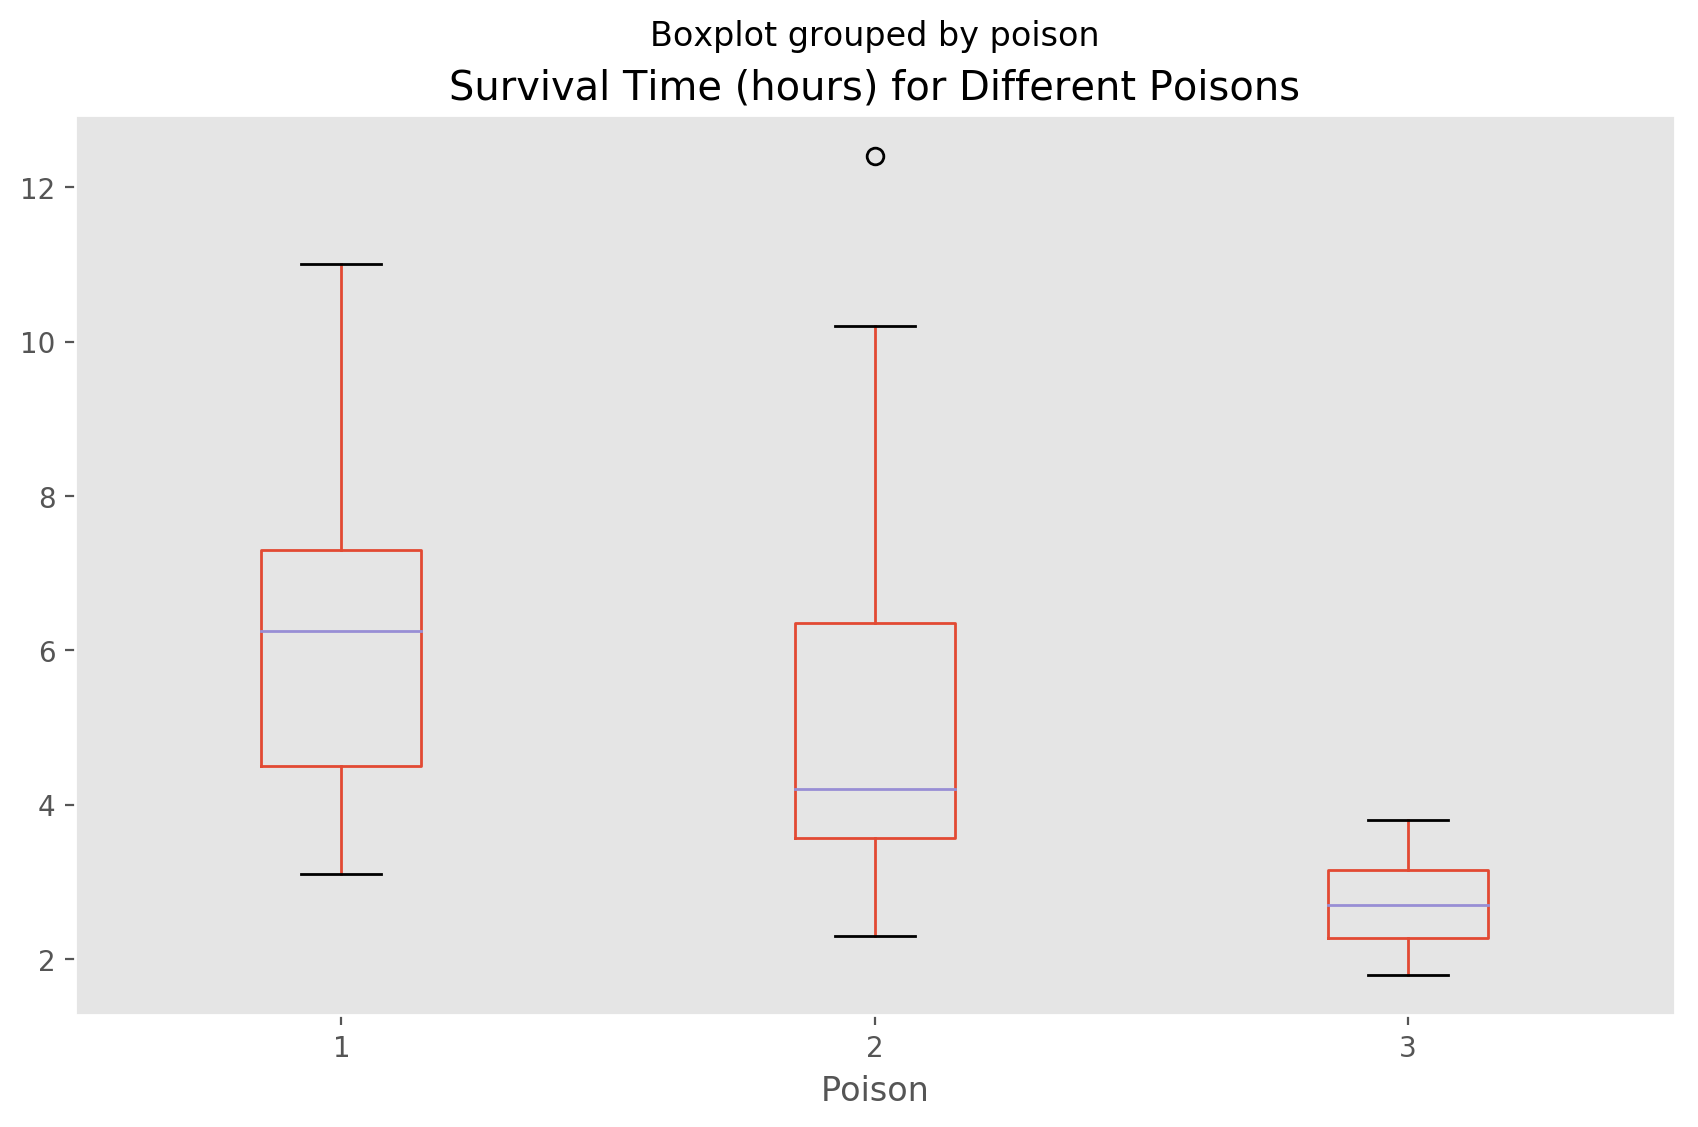

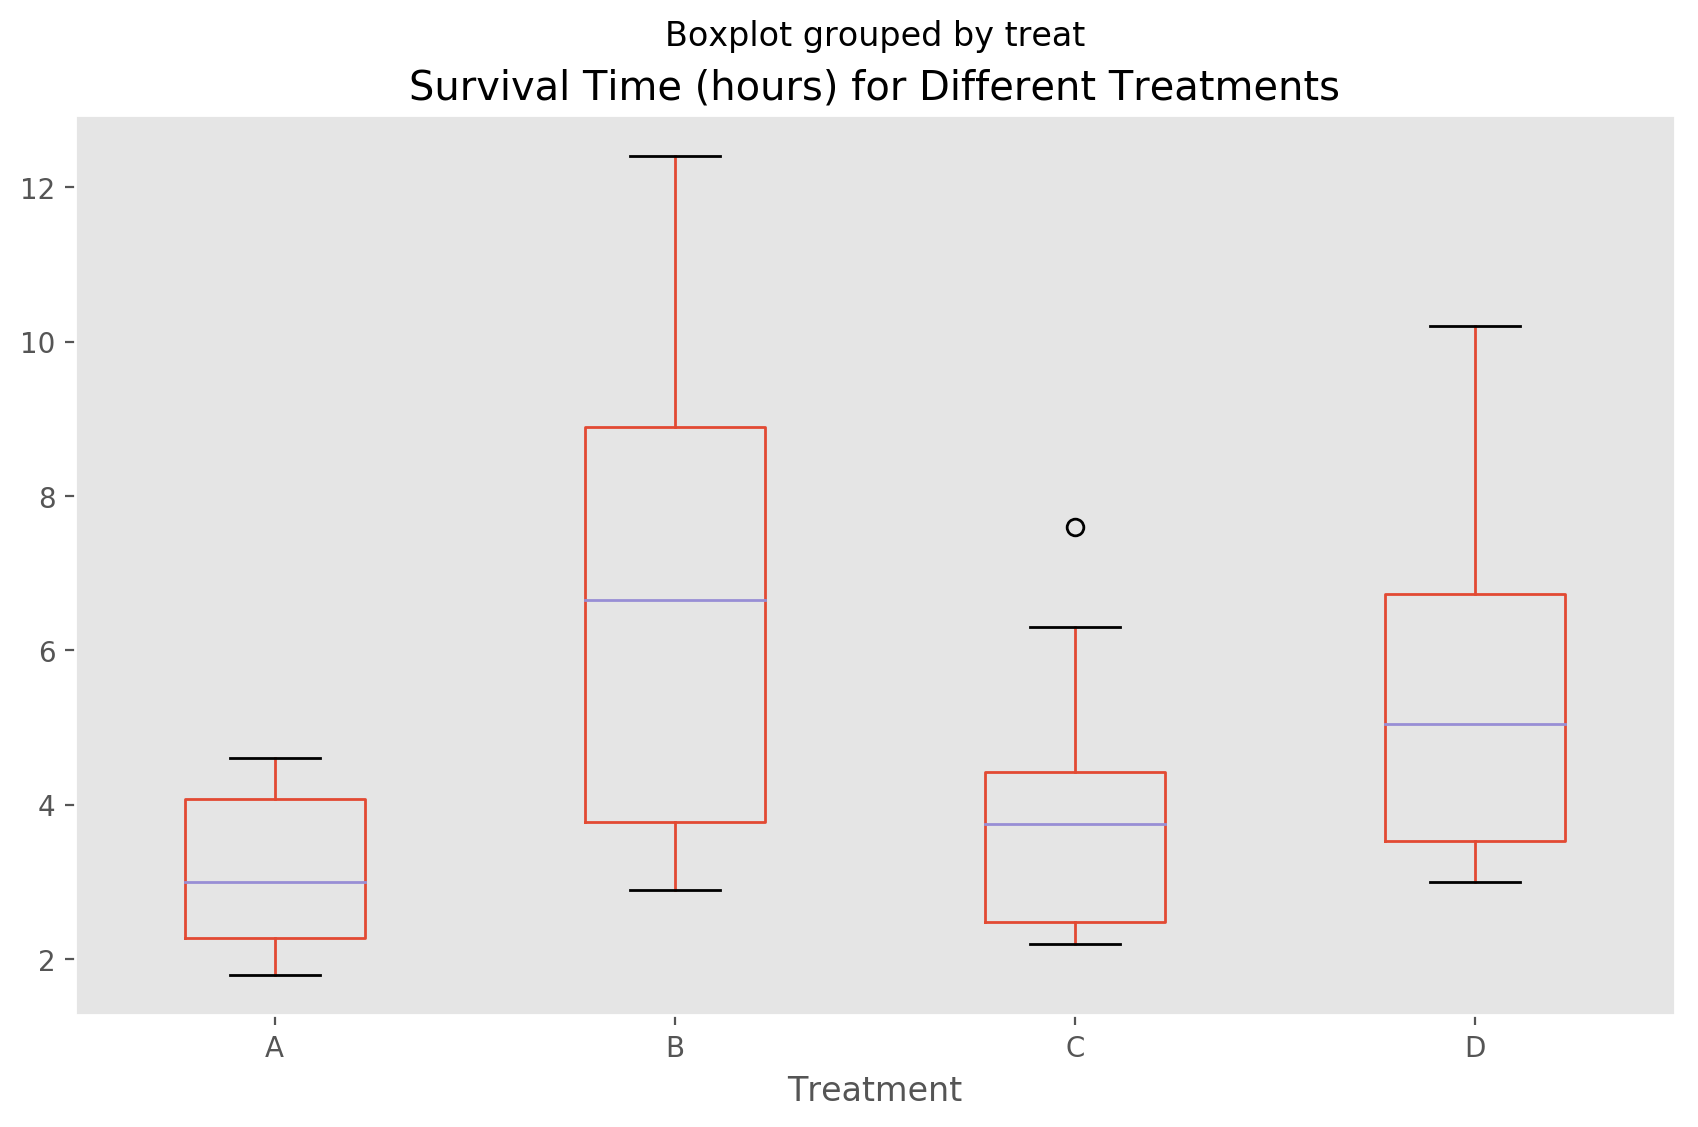

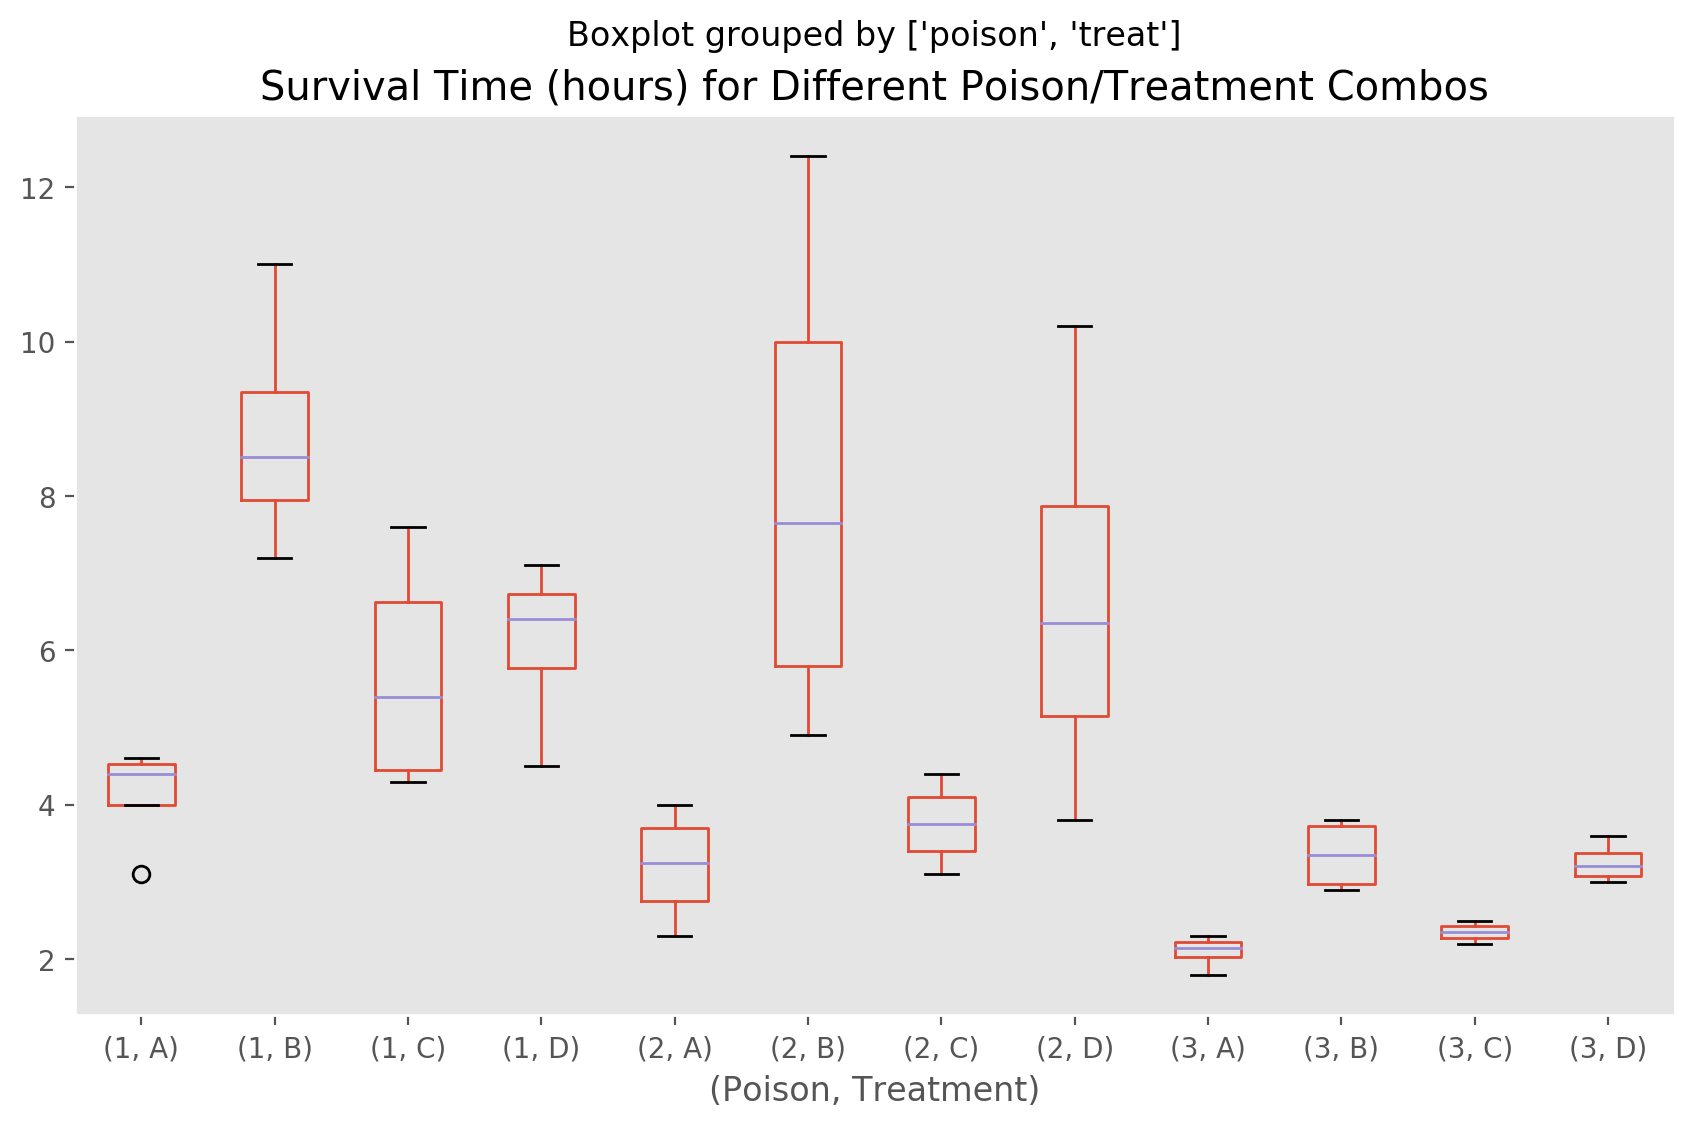

In [36]:
# data('poisons', show_doc=True)
poisons = data('poisons')
poisons['time'] = poisons['time']*10
poison = poisons.groupby('poison')
treatments = poisons.groupby('treat')
poisons.boxplot(['time'], by="poison", grid=False)
plt.title("Survival Time (hours) for Different Poisons")
plt.xlabel("Poison")
poisons.boxplot(['time'], by="treat", grid=False)
plt.title("Survival Time (hours) for Different Treatments")
plt.xlabel("Treatment")
poisons.boxplot(['time'], by=["poison", 'treat'], grid=False)
plt.title("Survival Time (hours) for Different Poison/Treatment Combos")
plt.xlabel("(Poison, Treatment)")
plt.show()

Poison 3 is most deadly.

Treatment B is most effective and I would choose it if I didn't know the poison.

I would choose treatment B regardless of the poison because it has the highest mean and the highest max for every poison.

- `"diamonds"`, prices and characteristics of almost 54,000 round-cut diamonds.
    1. How does the color and cut of a diamond affect its price?
    2. Of the diamonds with color `"H"`, those with a `"Fair"` cut sell, on average, for a higher price than those with an `"Ideal"` (superior) cut. What other factors could explain this unintuitive statistic?

In [47]:
data('diamonds', show_doc=True)
diamonds = data('diamonds')
diamonds.sample(20)

diamonds

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Prices of 50,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

### Usage

    data(diamonds)

### Format

A data frame with 53940 rows and 10 variables

### Details

  * price. price in US dollars (\$326–\$18,823) 

  * carat. weight of the diamond (0.2–5.01) 

  * cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

  * colour. diamond colour, from J (worst) to D (best) 

  * clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) 

  * x. length in mm (0–10.74) 

  * y. width in mm (0–58.9) 

  * z. depth in mm (0–31.8) 

  * depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) 

  * table. width of top of diamond relative to widest point (43–95) 




,carat,cut,color,clarity,depth,table,price,x,y,z
46738,0.72,Very Good,H,SI2,63.5,55.0,1799,5.66,5.62,3.58
21708,0.31,Ideal,G,SI1,61.6,55.0,627,4.37,4.39,2.70
30275,0.31,Ideal,I,VS2,62.3,53.8,447,4.32,4.36,2.70
33051,0.30,Ideal,F,VVS1,62.5,57.0,814,4.26,4.29,2.67
38098,0.36,Ideal,E,VS2,61.9,56.0,1013,4.59,4.56,2.83
41068,0.51,Ideal,F,SI2,60.2,55.0,1191,5.19,5.24,3.14
11042,0.33,Ideal,G,SI2,60.2,57.0,594,4.50,4.47,2.70
15086,1.22,Ideal,I,SI1,61.7,55.2,6062,6.84,6.90,4.24
28719,0.31,Very Good,E,VS2,62.9,56.0,680,4.29,4.33,2.71
53107,0.57,Ideal,E,VVS2,61.5,55.9,2615,5.31,5.35,3.28


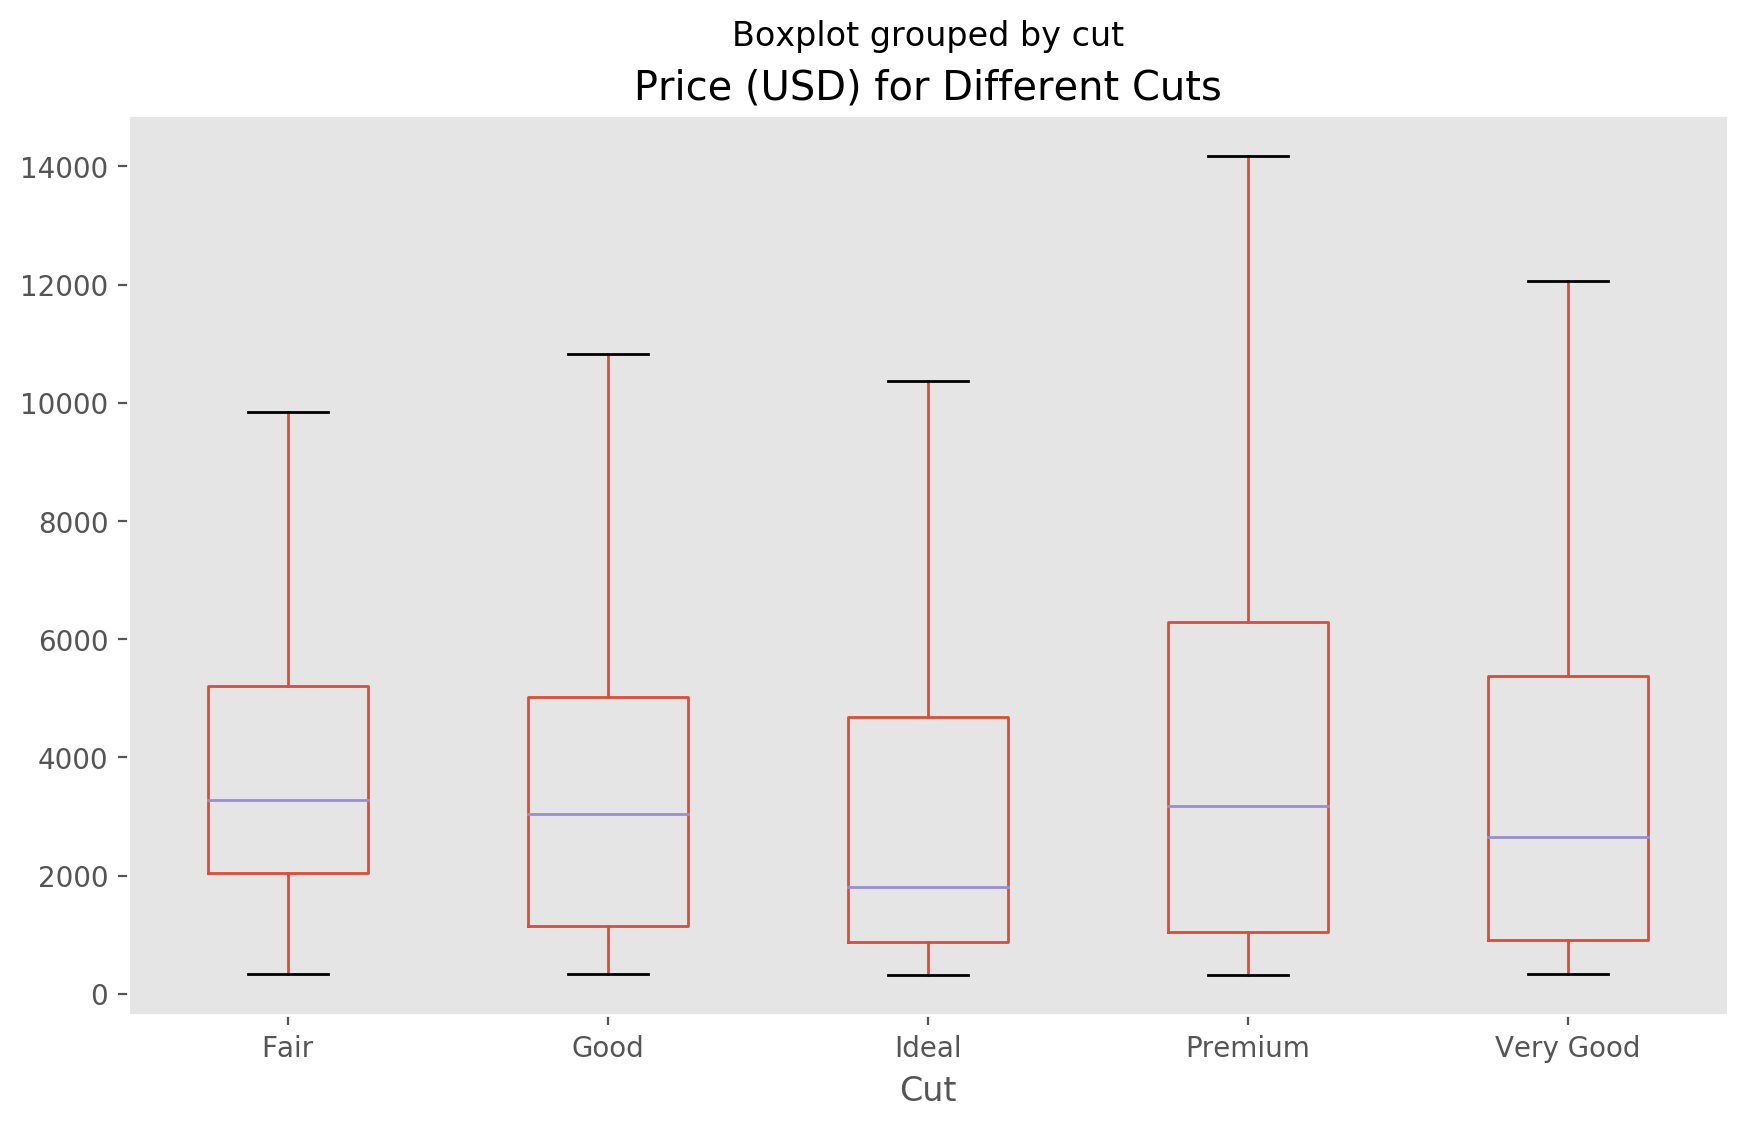

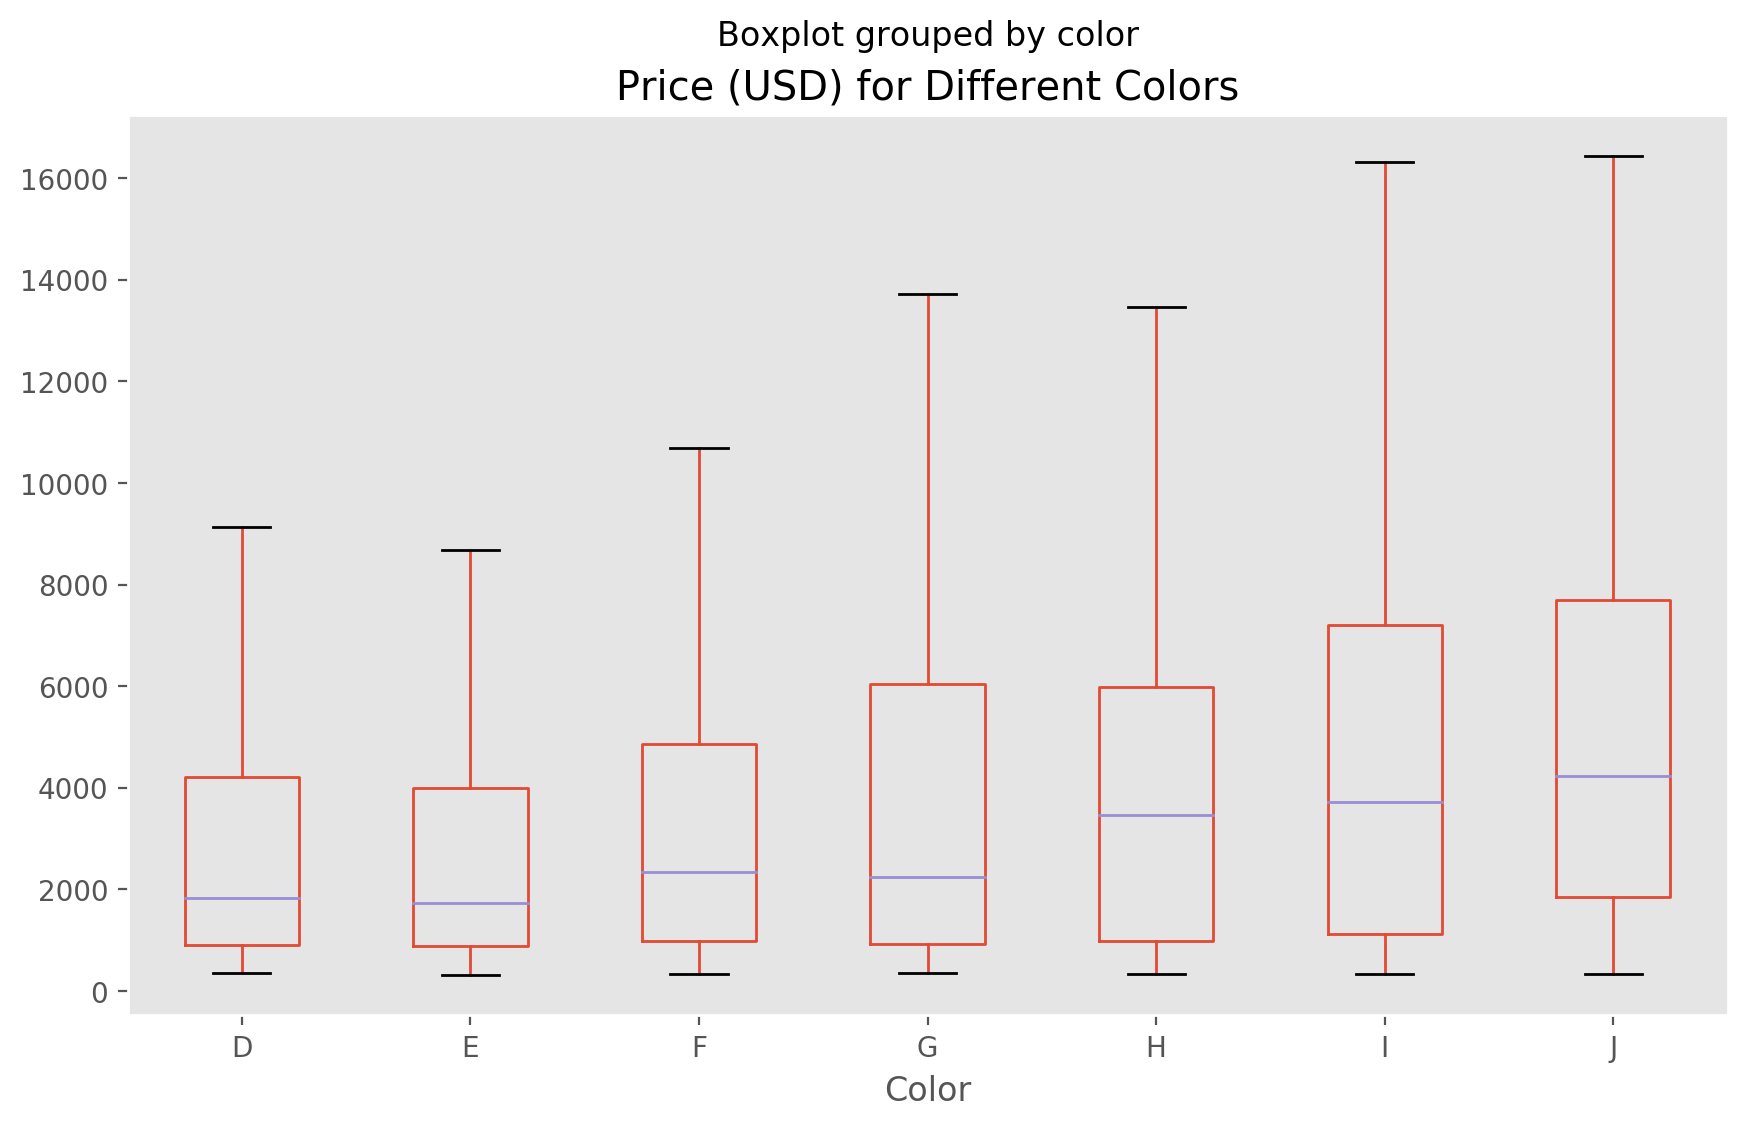

In [46]:
diamonds.boxplot('price', by=['cut'], grid=False, showfliers=False)
plt.title("Price (USD) for Different Cuts")
plt.xlabel("Cut")
diamonds.boxplot('price', by=['color'], grid=False, showfliers=False)
plt.title("Price (USD) for Different Colors")
plt.xlabel("Color")
plt.show()

## Problem 2

Suppose that someone claims that the city from which a passenger embarked had a strong influence on the passenger’s survival rate. Investigate this claim.
1. Check the survival rates of the passengers based on where they embarked from (given in the `"Embarked"` column).
2. Create a pivot table to examine survival rates based on both place of embarkment and gender.
3. What do these tables suggest to you about the significance of where people embarked in influencing their survival rate? Examine the context of the problem, and explain what you think this really means.
4. Investigate the claim further with at least two more pivot tables, exploring other criteria (e.g., class, age, etc.). Carefully explain your conclusions.

## Problem 3

Examine the following data sets from pydataset and answer the corresponding questions.
Use visualizations and/or pivot tables as appropriate to support your conclusions.
- `"npk"`, an experiment on the effects of nitrogen (N), phosphate (P), and potassium (K) on the growth of peas.
    1. Which element is most effective in general for simulating growth? Which is the least effective?
    2. What combination of N, P, and K is optimal? What combination is the worst?

- `"swiss"`,standardized fertility measures and socio-economic indicators for French-speaking provinces of Switzerland at about 1888.
    1. What is the relationship in the data between fertility rates and infant mortality?
    2. How are provinces that are predominantly Catholic different from non-Catholic provinces, if at all?
    3. What factors in the data are the most important for predicting fertility?

- Examine a data set of your choice. Formulate simple questions about the data and hypothesize the answers to those questions. Demonstrate the correctness of incorrectness of each hypothesis. Explain your conclusions.